In [1]:
import xarray as xr
import xesmf as xe
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import dask
import cftime
import random
import glob
import matplotlib.gridspec as gs


In [2]:
from dask.distributed import Client, LocalCluster
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 7,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36225,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 7
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:41027,Total threads: 1
Dashboard: /proxy/38835/status,Memory: 4.57 GiB
Nanny: tcp://127.0.0.1:42895,


In [12]:
test = xr.open_dataset("/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cw323a.pm098101_mon.nc")

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/xarray/coding/times.py:710: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [17]:
test.fld_s05i216

<xarray.DataArray 'fld_s05i216' (time: 1, lat: 144, lon: 192)>
[27648 values with dtype=float32]
Coordinates:
  * time              (time) object 0981-01-16 12:00:00
  * lat               (lat) float64 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon               (lon) float64 0.9375 2.812 4.688 ... 355.3 357.2 359.1
    surface_altitude  (lat, lon) float32 ...
    height            float64 ...
    height_0          float64 ...
Attributes:
    standard_name:    precipitation_flux
    long_name:        TOTAL PRECIPITATION RATE     KG/M2/S
    units:            kg m-2 s-1
    um_stash_source:  m01s05i216
    cell_methods:     time: mean
    grid_mapping:     latitude_longitude

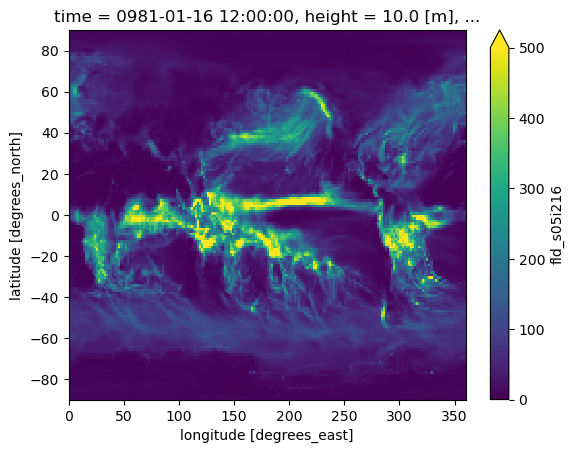

In [10]:
(86400*30*test.fld_s05i216[0]).plot(vmin = 0, vmax = 500)

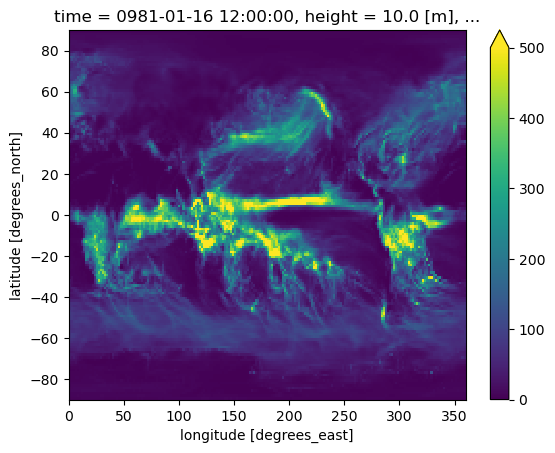

In [14]:
(86400*30*(test.fld_s05i214[0]+test.fld_s05i215[0])).plot(vmin = 0, vmax = 500)

In [28]:
test.fld_s03i209

<xarray.DataArray 'fld_s03i209' (time: 1, lat: 144, lon_u: 192)>
[27648 values with dtype=float32]
Coordinates:
  * time      (time) object 0981-01-16 12:00:00
  * lat       (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon_u     (lon_u) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height    float64 ...
    height_0  float64 ...
Attributes:
    standard_name:    eastward_wind
    long_name:        10 METRE WIND U-COMP
    units:            m s-1
    um_stash_source:  m01s03i209
    cell_methods:     time: mean
    grid_mapping:     latitude_longitude

In [3]:
data_dir = "/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/"

In [4]:
outdir = "/g/data/e14/sm2435/Exps_ACCESS_initial/VC_pr/"

In [5]:
for i in range(991,1001,1):
    formatted_i = str(i).zfill(4)
    files = data_dir + f"cy286a.pm{formatted_i}*"
    print(files)
    rain = xr.open_mfdataset(files, use_cftime=True, chunks= {"time":12}).fld_s05i216
    rain.to_netcdf(outdir+f"VC_pr{formatted_i}.nc")

/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0991*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0992*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0993*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0994*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0995*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0996*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0997*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0998*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0999*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm1000*


In [8]:
data_dir = "/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/"
outdir = "/g/data/e14/sm2435/Exps_ACCESS_initial/OC_pr/"
for i in range(981,1001,1):
    formatted_i = str(i).zfill(4)
    files = data_dir + f"cw323a.pm{formatted_i}*"
    print(files)
    rain = xr.open_mfdataset(files, use_cftime=True, parallel=True).fld_s05i216
    rain.to_netcdf(outdir+f"OC_pr{formatted_i}.nc")

/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0981*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0982*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0983*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0984*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0985*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0986*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0987*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0988*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0989*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0990*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0991*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0992*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0993*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0994*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/ne

In [12]:
test =  xr.open_mfdataset("/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0951*", use_cftime=True, parallel=True)

In [15]:
files

' /g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0951*'

In [16]:
data_dir = "/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/"
outdir = "/g/data/e14/sm2435/Exps_ACCESS_initial/OC_pr/"
for i in range(951,981,1):
    formatted_i = str(i).zfill(4)
    files = data_dir + f"cw323a.pm{formatted_i}*"
    print(files)
    rain = xr.open_mfdataset(files, use_cftime=True, parallel=True).fld_s05i216
    rain.to_netcdf(outdir+f"OC_pr{formatted_i}.nc")

/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0951*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0952*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0953*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0954*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0955*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0956*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0957*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0958*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0959*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0960*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0961*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0962*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0963*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0964*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0

In [7]:
data_dir = "/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/"
#cm000a.pm0951_mon.nc"
outdir = "/g/data/e14/sm2435/Exps_ACCESS_initial/ctrl_pr/"
for i in range(951,1152,1):
    formatted_i = str(i).zfill(4)
    files = data_dir + f"cm000a.pm{formatted_i}_mon.nc"
    print(files)
    rain = xr.open_dataset(files, use_cftime=True, chunks= {"time":12}).fld_s05i216
    rain.to_netcdf(outdir+f"ctrl_pr{formatted_i}.nc")

/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0951_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0952_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0953_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0954_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0955_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0956_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0957_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0958_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0959_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0960_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0961_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP

FileNotFoundError: [Errno 2] No such file or directory: b'/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1151_mon.nc'

In [ ]:
data_dir = "/scratch/w97/zg0866/cs947_raw/history/atm/"
#cm000a.pm0951_mon.nc"
outdir = "/g/data/e14/sm2435/Exps_ACCESS_initial/MC_pr/"
for i in range(1050,1103,1):
    formatted_i = str(i).zfill(4)
    files = data_dir + f"cs947a.pm{formatted_i}*.nc"
    print(files)
    rain = xr.open_mfdataset(files, use_cftime=True, chunks= {"time":12}).fld_s05i216
    rain.to_netcdf(outdir+f"MC_pr{formatted_i}.nc")

/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0951*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0952*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0953*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0954*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0955*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0956*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0957*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0958*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0959*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0960*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0961*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0962*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0963*.nc
